# Tiền Xử Lý và Trích Xuất Đặc Trưng

Notebook thực hiện tiền xử lý dữ liệu và trích xuất đặc trưng bằng cách sử dụng phương pháp Bag of Words (BoW)
- Chuyển văn bản

## 1. Import các thư viện cần thiết

In [2]:
import pandas as pd
import re
from IPython import display
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

## 2. Tải các gói cần thiết từ NLTK

In [3]:
# Tải bộ stopwords của NLTK và các tệp cần thiết
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 3. Định nghĩa hàm tiền xử lý dữ liệu

Hàm này thực hiện các bước tiền xử lý cơ bản cho văn bản:
- Chuyển văn bản thành chữ thường
- Xóa thẻ HTML
- Xóa dấu câu
- Tách từ
- Loại bỏ stopwords
- Lemmatization (chuyển từ về dạng gốc)

In [4]:
def TienXuLyDuLieu(text):
    text = text.lower()  # Chuyển chữ thường
    text = re.sub(r'<br\s*/?>', ' ', text)  # Xóa thẻ <br> hoặc <br/> và thay thế bằng khoảng trắng
    text = re.sub(r'[^\w\s]', '', text)  # Xóa dấu câu
    words = word_tokenize(text)  # Tách từ
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # Xóa stopwords + lemmatization
    return " ".join(words)

## 4. Đọc và chuẩn bị dữ liệu

In [5]:
# Đọc dữ liệu dataset
df = pd.read_csv("Reviews.csv")

# Xem thông tin cơ bản về dataset
print("Kích thước của dataset:", df.shape)
df.head()

Kích thước của dataset: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 5. Lấy mẫu dữ liệu cân bằng theo điểm đánh giá (Score)

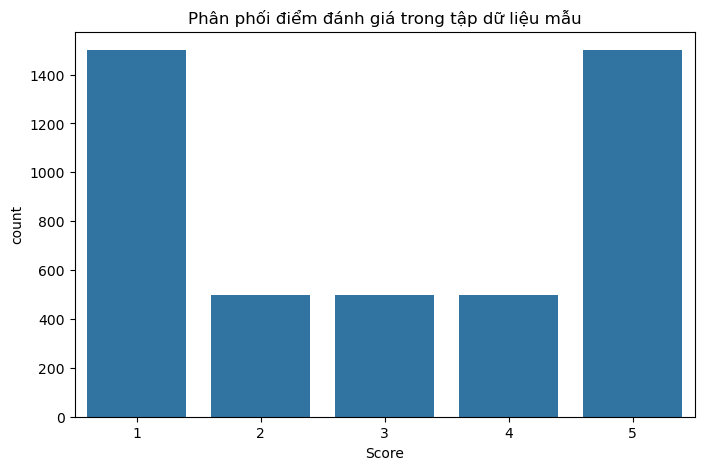

In [6]:
# Lấy các mẫu nhỏ trong dataset để tìm đặc trưng
one_1500 = df[df['Score'] == 1].sample(n=1500)
two_500 = df[df['Score'] == 2].sample(n=500)
three_500 = df[df['Score'] == 3].sample(n=500)
four_500 = df[df['Score'] == 4].sample(n=500)
five_1500 = df[df['Score'] == 5].sample(n=1500)

# Kết hợp các mẫu đã lấy
CacMauThuNghiem = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

# Xem phân phối điểm đánh giá trong tập dữ liệu mẫu
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=CacMauThuNghiem)
plt.title('Phân phối điểm đánh giá trong tập dữ liệu mẫu')
plt.show()

## 6. Khám phá và tiền xử lý dữ liệu

In [7]:
# Tách một ví dụ từ cột 'Text'
example = CacMauThuNghiem['Text'].iloc[49]
print("Cột Text phiên bản gốc:\n", example)

# Tokenize và in kết quả
token = nltk.word_tokenize(example)
print("\nTokenized words:\n", token)

Cột Text phiên bản gốc:
 The catnip pellets look and smell like rabbit food, my cats weren't interested in them in the slightest. It comes with 4 poofy ball things as well, but they're not so much toys as something you could buy in a craft store. Overall, just stick with flakes or whole catnip buds. The less processed the catnip, the better.

Tokenized words:
 ['The', 'catnip', 'pellets', 'look', 'and', 'smell', 'like', 'rabbit', 'food', ',', 'my', 'cats', 'were', "n't", 'interested', 'in', 'them', 'in', 'the', 'slightest', '.', 'It', 'comes', 'with', '4', 'poofy', 'ball', 'things', 'as', 'well', ',', 'but', 'they', "'re", 'not', 'so', 'much', 'toys', 'as', 'something', 'you', 'could', 'buy', 'in', 'a', 'craft', 'store', '.', 'Overall', ',', 'just', 'stick', 'with', 'flakes', 'or', 'whole', 'catnip', 'buds', '.', 'The', 'less', 'processed', 'the', 'catnip', ',', 'the', 'better', '.']


In [8]:
# Áp dụng tiền xử lý văn bản cho cột 'Text' và in ra kết quả
CacMauThuNghiem['Text_Cleaned'] = CacMauThuNghiem['Text'].map(TienXuLyDuLieu)
print(f"\nVăn bản sau khi làm sạch:\n{CacMauThuNghiem['Text_Cleaned'].iloc[49]}")


Văn bản sau khi làm sạch:
catnip pellet look smell like rabbit food cat werent interested slightest come 4 poofy ball thing well theyre much toy something could buy craft store overall stick flake whole catnip bud less processed catnip better


## 7. Trích xuất đặc trưng Bag of Words (BoW)

In [9]:
# Lấy mẫu 5 dòng dữ liệu từ Dataset
sampled_reviews = CacMauThuNghiem.sample(n=5, random_state=42)
sampled_reviews['Text_Length'] = sampled_reviews['Text'].apply(len)
sampled_reviews['Word_Count'] = sampled_reviews['Text_Cleaned'].apply(lambda x: len(x.split()))

# Hiển thị thông tin của 5 dòng đã chọn
print("\nThông tin của 5 dòng đã chọn:")
print(sampled_reviews[['Score', 'Text_Cleaned']])


Thông tin của 5 dòng đã chọn:
        Score                                       Text_Cleaned
314618      3  beef steak tip mash potato lower end hormel li...
177049      5  first time tasting say omg good fattening whol...
36405       4  skeptical product first saw chef use tv intrig...
306092      4  recieved free sample veggie krinkle stick real...
72759       1  pack received amazon another nutrition fact st...


In [10]:
# Trích xuất đặc trưng BoW
vectorizer = CountVectorizer(max_features=20)  # Giới hạn số lượng đặc trưng để dễ nhìn thấy kết quả
bow_matrix = vectorizer.fit_transform(sampled_reviews['Text_Cleaned'])

# Hiển thị các từ trong từ điển BoW
feature_names = vectorizer.get_feature_names_out()
print("\nCác từ trong từ điển BoW:")
print(feature_names)


Các từ trong từ điển BoW:
['fact' 'fill' 'first' 'good' 'hormel' 'mashed' 'noodle' 'one' 'original'
 'potato' 'preservative' 'pretty' 'prune' 'quickly' 'really' 'rinse'
 'sticker' 'taste' 'try' 'would']


In [11]:
# In ra ma trận BoW trích xuất đặc trưng của 5 dòng
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_names)
bow_df.index = sampled_reviews.index

# Kết hợp với các đặc trưng khác
df_features = pd.concat([sampled_reviews[['Text_Length', 'Word_Count', 'Score']], bow_df], axis=1)

print(f"\nĐặc trưng đã trích xuất: {df_features.shape[1]} đặc trưng")
print(df_features.head())


Đặc trưng đã trích xuất: 23 đặc trưng
        Text_Length  Word_Count  Score  fact  fill  first  good  hormel  \
314618         1073          95      3     0     2      0     1       2   
177049          246          21      5     0     0      1     1       0   
36405           535          48      4     0     0      2     0       0   
306092          188          16      4     0     0      0     0       0   
72759           482          44      1     2     0      0     0       0   

        mashed  noodle  ...  preservative  pretty  prune  quickly  really  \
314618       3       0  ...             0       1      0        2       3   
177049       0       0  ...             0       0      0        1       0   
36405        0       4  ...             0       1      0        0       0   
306092       0       0  ...             0       0      0        0       1   
72759        0       0  ...             2       0      2        0       0   

        rinse  sticker  taste  try  would  
314

## 9. Trích xuất đặc trưng BoW cho toàn bộ tập dữ liệu

In [12]:
# Trích xuất đặc trưng BoW cho toàn bộ tập dữ liệu với nhiều đặc trưng hơn
full_vectorizer = CountVectorizer(max_features=1000)
full_bow_matrix = full_vectorizer.fit_transform(CacMauThuNghiem['Text_Cleaned'])

print(f"Kích thước ma trận BoW: {full_bow_matrix.shape}")

# Top từ xuất hiện nhiều nhất
feature_names = full_vectorizer.get_feature_names_out()
count_sum = full_bow_matrix.sum(axis=0)
word_freq = [(word, count_sum[0, idx]) for idx, word in enumerate(feature_names)]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

print("\nTop 20 từ xuất hiện nhiều nhất:")
for word, freq in word_freq[:20]:
    print(f"{word}: {freq}")

Kích thước ma trận BoW: (4500, 1000)

Top 20 từ xuất hiện nhiều nhất:
like: 2268
taste: 1895
product: 1764
one: 1538
flavor: 1532
coffee: 1458
good: 1411
food: 1262
would: 1170
tea: 1119
love: 956
dog: 932
get: 918
great: 915
dont: 790
really: 783
time: 778
make: 763
much: 761
bag: 718


## 10. Trực quan hóa các từ xuất hiện nhiều nhất

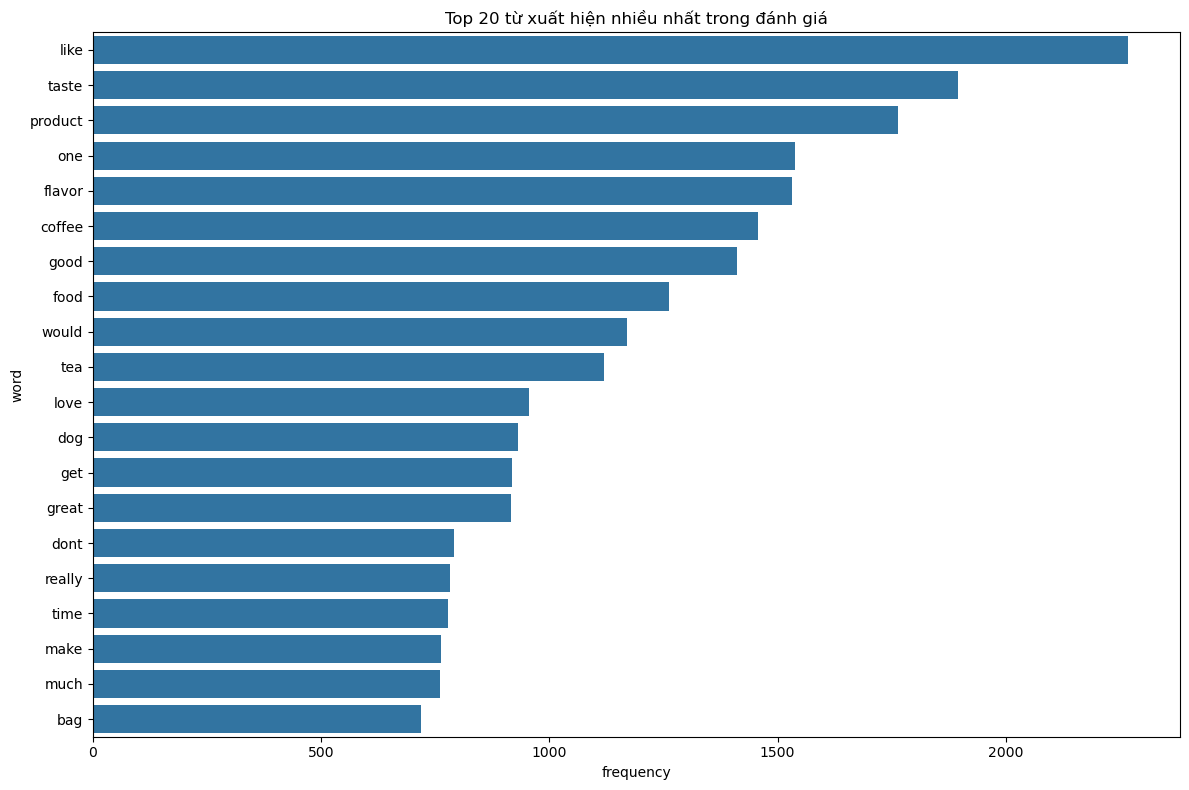

In [13]:
# Trực quan hóa top từ xuất hiện nhiều nhất
top_words = pd.DataFrame(word_freq[:20], columns=['word', 'frequency'])
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=top_words)
plt.title('Top 20 từ xuất hiện nhiều nhất trong đánh giá')
plt.tight_layout()
plt.show()

## kết thúc